In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [2]:
df_train=pd.read_csv('counterfeit_train.csv')
df_test=pd.read_csv('counterfeit_test.csv')

In [3]:
df_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
df_train['Medicine_MRP']

0       160.2366
1       110.4384
2       259.4092
3        99.9830
4        56.4402
          ...   
6813    204.1452
6814    235.1088
6815    193.6292
6816    162.8682
6817    177.5500
Name: Medicine_MRP, Length: 6818, dtype: float64

In [5]:
df_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


# Data Cleaning 

In [6]:
#checking unique values in the columns
for col in df_train.select_dtypes(['object']).columns:
    print(col, ':' , df_train[col].nunique())

Medicine_ID : 1557
DistArea_ID : 10
Medicine_Type : 16
SidEffect_Level : 2
Area_Type : 4
Area_City_Type : 3
Area_dist_level : 4


Notes:

     0   Medicine_ID => Drop
     1   Counterfeit_Weight => Update to remove NaN
     2   DistArea_ID => convert to dummies [10 unique values]
     3   Active_Since => convert to dummies [9 unique values]
     4   Medicine_MRP => Drop
     5   Medicine_Type => convert to dummies [16 unique values]
     6   SidEffect_Level => convert to dummies [2 unique values]
     7   Availability_rating => Drop 
     8   Area_Type => convert to dummies [10 unique values]                
     9   Area_City_Type => convert to dummies [3 unique values]                              
     10  Area_dist_level=> convert to dummies [4 unique values]                

In [7]:
df_train['Counterfeit_Weight'].describe()
df_test['Counterfeit_Weight'].describe()

count    1408.000000
mean       14.328604
std         4.616129
min         5.855000
25%        10.300000
50%        14.300000
75%        18.300000
max        22.650000
Name: Counterfeit_Weight, dtype: float64

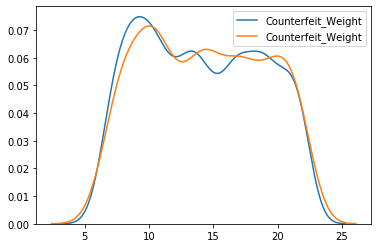

In [8]:
p1=sns.kdeplot(df_train['Counterfeit_Weight'])
p1=sns.kdeplot(df_test['Counterfeit_Weight'])

In [9]:
#filling missing values with median values 

df_train['Counterfeit_Weight'].fillna(13.80, inplace=True)
df_test['Counterfeit_Weight'].fillna(14.30, inplace=True)

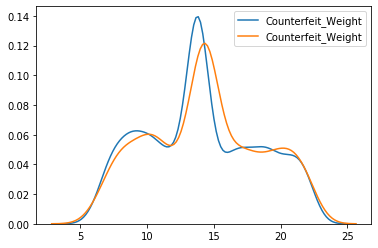

In [10]:
p1=sns.kdeplot(df_train['Counterfeit_Weight'])
p1=sns.kdeplot(df_test['Counterfeit_Weight'])

In [11]:
conv_dummies = ['DistArea_ID', 'Active_Since', 'Medicine_Type', 'SidEffect_Level', 'Area_Type' ,'Area_City_Type', 'Area_dist_level']

for col in conv_dummies:
    dummy=pd.get_dummies(df_train[col],prefix=col,drop_first=True)
    df_train=pd.concat([df_train,dummy],axis=1)
    print(col)
    del df_train[col]
del dummy

for col in conv_dummies:
    dummy=pd.get_dummies(df_test[col],prefix=col,drop_first=True)
    df_test=pd.concat([df_test,dummy],axis=1)
    #print(col)
    del df_test[col]
del dummy

DistArea_ID
Active_Since
Medicine_Type
SidEffect_Level
Area_Type
Area_City_Type
Area_dist_level


In [12]:
# df_train.drop(['Medicine_MRP','Availability_rating'],1, inplace=True)
# df_test.drop(['Medicine_MRP','Availability_rating'],1, inplace=True)

# Modelling 

In [13]:
X=df_train.drop(['Medicine_ID', 'Counterfeit_Sales'],1)
y=df_train['Counterfeit_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


## Extra trees

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

et=ExtraTreesRegressor()

et.fit(X_train, y_train)

pred_et=et.predict(X_test)

m=mae(y_test, pred_et)
print(1-m/1660)

0.4957336969729358


In [23]:
param_dist = { 'n_estimators':[10,20,50,100],
               'max_depth' : [3,5,10,50,None],
               'min_samples_split':[2,5,10,15],
               'min_samples_leaf':[1,5,10,15],
                'max_leaf_nodes' :[5,7,10,16,20,30,45,50,70]                }

et_ht=ExtraTreesRegressor()

grid=RandomizedSearchCV(estimator=et_ht, param_distributions=param_dist, verbose=1,n_jobs=-1, n_iter=100)

grid_result=grid.fit(X_train, y_train)

print(grid_result.best_score_)

print(grid_result.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   36.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   37.0s finished


0.6077414511970513
{'n_estimators': 50, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_leaf_nodes': 20, 'max_depth': 10}


In [25]:
et_best=ExtraTreesRegressor(n_estimators=50, min_samples_leaf=1, min_samples_split=15, max_leaf_nodes=20, max_depth=10)

et_best.fit(X_train, y_train)

pred_et_best = et_best.predict(X_test)


m=mae(y_test, pred_et_best)
print(1-m/1660)

0.5425898732216726
